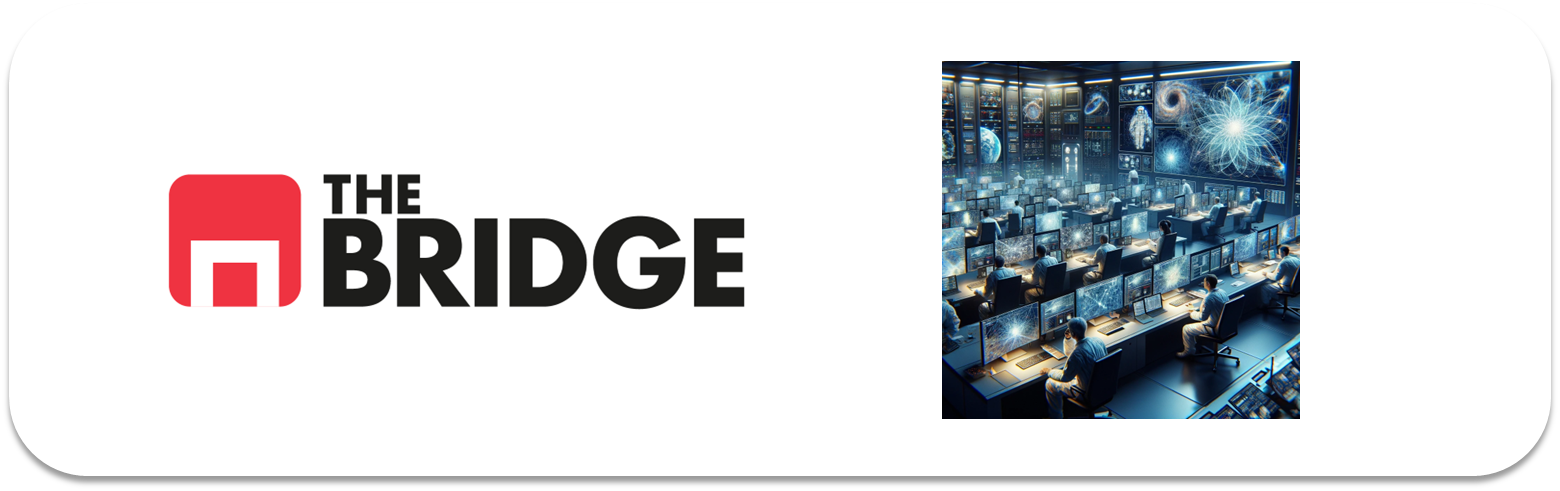

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
import cv2

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [86]:

def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    def loop_folders(directorio,X,y,reshape_dim):
            
            for file in os.listdir(directorio):
                #print(f"file:{file}")
                image = imread('/'.join([directorio, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32
                X.append(image)
                animal_class = file.split(".")
                y.append(animal_class[0])
    
    if isinstance(directorio, list):
        directorios=directorio
        directorio="" 
        for directorio in directorios:
            #print(f"directorio:{directorio}")
            loop_folders(directorio,X,y,reshape_dim)
    else:
            loop_folders(directorio,X,y,reshape_dim)


    return np.array(X),np.array(y)

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

In [54]:
ROOT_PATH = './data/'
TRAIN_PATH = [ROOT_PATH + "github_train_0/",
              ROOT_PATH + "github_train_1/",
              ROOT_PATH + "github_train_2/",
              ROOT_PATH + "github_train_3/"]
TEST_PATH = ROOT_PATH + "github_test/"

In [55]:
X_train,y_train = read_data(TRAIN_PATH)


In [56]:
print(X_train)


[[[[126 100  64]
   [118  92  53]
   [129 104  63]
   ...
   [ 88  69  45]
   [ 98  40  25]
   [121  72  50]]

  [[113  92  61]
   [122 102  68]
   [131 111  75]
   ...
   [131  75  57]
   [ 99  53  23]
   [ 99  42  22]]

  [[120  96  64]
   [133 110  74]
   [126 103  63]
   ...
   [ 79  25  12]
   [ 50  12   2]
   [ 79  32   6]]

  ...

  [[ 15  15  10]
   [ 82  79  69]
   [ 73  67  51]
   ...
   [103  95  69]
   [ 83  75  53]
   [ 98  92  60]]

  [[ 97  99  88]
   [ 66  63  49]
   [ 80  69  51]
   ...
   [ 70  61  39]
   [ 88  79  61]
   [100  92  68]]

  [[ 63  55  44]
   [ 64  55  39]
   [ 82  71  50]
   ...
   [ 86  72  46]
   [116 101  77]
   [ 94  82  55]]]


 [[[218  47  83]
   [206  26  63]
   [216  63  91]
   ...
   [216  32  76]
   [213  19  53]
   [212  21  52]]

  [[215  49  81]
   [224  40  78]
   [225  72 102]
   ...
   [214  32  76]
   [214  19  58]
   [210  19  50]]

  [[206  32  67]
   [207  23  61]
   [211  55  86]
   ...
   [209  28  71]
   [214  21  52]
   [208  17

In [57]:
print(y_train)

['cat' 'cat' 'cat' ... 'dog' 'dog' 'dog']


In [58]:
X_test, y_test = read_data(TEST_PATH)

In [59]:
print(y_test)


['cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'c

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

In [60]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)

X train shape:  (4000, 32, 32, 3)
Y train shape:  (4000,)


In [61]:
print('X train shape: ', X_test.shape)
print('Y train shape: ', y_test.shape)

X train shape:  (1000, 32, 32, 3)
Y train shape:  (1000,)


In [62]:
def show_images_batch(paisajes, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(paisajes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(paisajes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

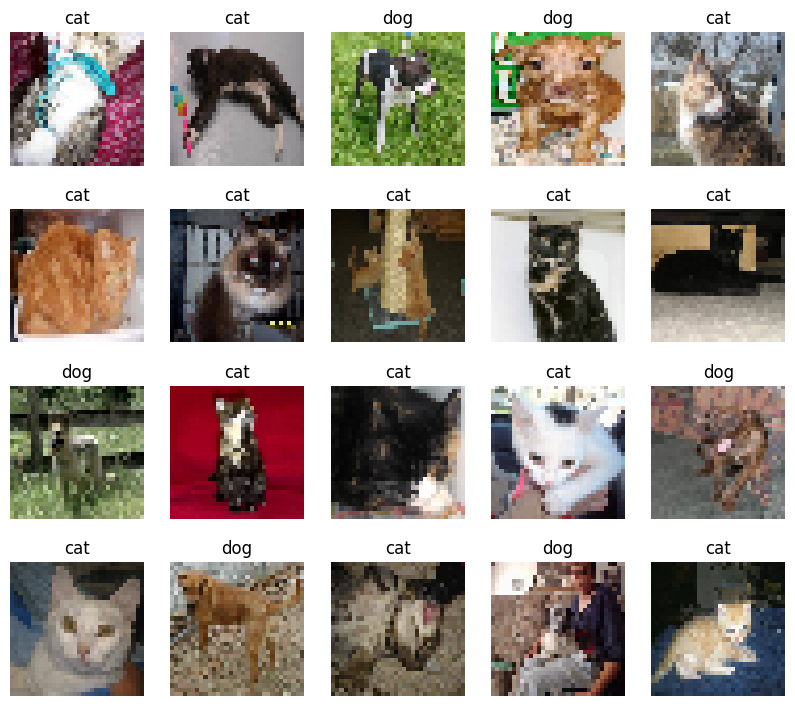

In [63]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

In [64]:
targets = pd.Series(y_train)
targets.value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

Está proporcionado a partes iguales

In [65]:
X_train = X_train/255
X_test = X_test/255

Escalamos diviendo por 255

In [66]:


capas = [keras.layers.Conv2D(filters = 30, kernel_size = (3, 3),
                            input_shape = (X_train[0].shape), 
                            padding = "same",
                            activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos otra capa de convolución y pooling
         keras.layers.Conv2D(filters = 15, 
                             kernel_size = (3, 3),
                             padding = "same", 
                             activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2)),

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
         keras.layers.Flatten(),

# Añadimos dos capas densas para la clasificación 
         keras.layers.Dense(units = 150, activation = 'relu'),
         keras.layers.Dense(units = 100, activation = 'relu'),

# Añadimos la capa de salida con 2 neuronas, una por cada clase
         keras.layers.Dense(2, activation = 'softmax')]

# Creamos el modelo
model = keras.Sequential(capas)

In [67]:
X_train.size

12288000

In [68]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 30)        840       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 15)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_3 (Dense)             (None, 150)              

In [70]:
animal = {tipo:indice for indice,tipo in enumerate(targets.unique())} # Rehusando la serie que creamos para ver la distribución del target
animal

{'cat': 0, 'dog': 1}

In [71]:
y_train_num = np.array([animal[y] for y in y_train])
y_test_num = np.array([animal[y] for y in y_test])

In [72]:
X_train, y_train_num = shuffle(X_train, y_train_num)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

In [73]:
history = model.fit(X_train,
                    y_train_num,
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 32, 
                    callbacks= [keras.callbacks.EarlyStopping(patience = 20, restore_best_weights= True)]) # Queremos recuperar los pesos de la mejor de las epocas durante el periodo de patience

Epoch 1/100
100/100 [==============================] - 2s 9ms/step - loss: 0.6901 - accuracy: 0.5366 - val_loss: 0.6830 - val_accuracy: 0.5425
Epoch 2/100
100/100 [==============================] - 1s 7ms/step - loss: 0.6530 - accuracy: 0.6069 - val_loss: 0.6684 - val_accuracy: 0.5738
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 0.6154 - accuracy: 0.6634 - val_loss: 0.6209 - val_accuracy: 0.6750
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.5759 - accuracy: 0.6984 - val_loss: 0.6150 - val_accuracy: 0.6712
Epoch 5/100
100/100 [==============================] - 1s 10ms/step - loss: 0.5286 - accuracy: 0.7316 - val_loss: 0.6396 - val_accuracy: 0.6725
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.4837 - accuracy: 0.7572 - val_loss: 0.6345 - val_accuracy: 0.6900
Epoch 7/100
100/100 [==============================] - 1s 10ms/step - loss: 0.4373 - accuracy: 0.7869 - val_loss: 0.6480 - val_accuracy: 0.66

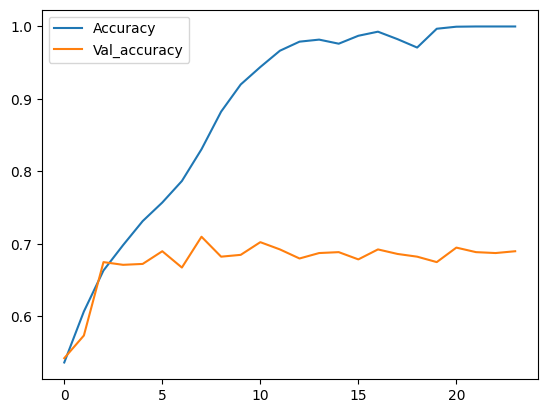

In [83]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')
plt.legend();

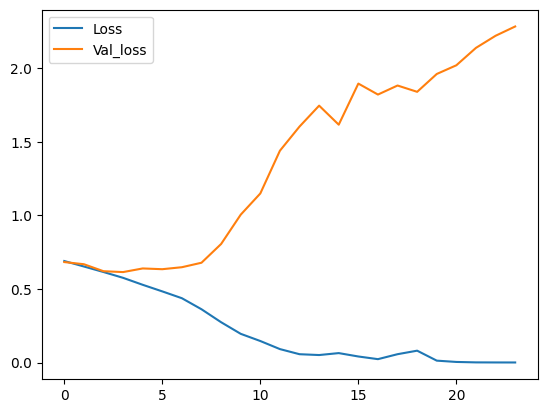

In [75]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

In [76]:
model.evaluate(X_test, y_test_num)

32/32 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.6890


[0.5961746573448181, 0.6890000104904175]

In [77]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

32/32 [==============================] - 0s 4ms/step


In [78]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_animal = {valor:clave for clave,valor in animal.items()}
y_test_labels = [inverse_animal[y] for y in y_test_num]
y_pred_labels = [inverse_animal[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

         cat       0.67      0.75      0.71       500
         dog       0.71      0.63      0.67       500

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



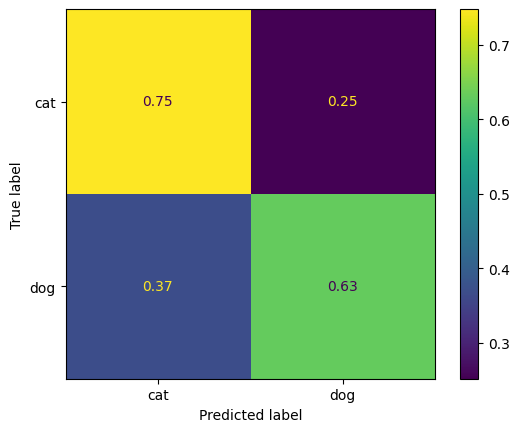

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

In [80]:
confianza = [prediction.max() for prediction in model.predict(X_test)]
#se busca el valor más alto de la confianza en y_pred/prediction

32/32 [==============================] - 0s 3ms/step


In [81]:
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})
#se crea una DataFrame con la etiqueta correcta, la predicción y su grado de confianza

In [82]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores
#se filtra el dataframe de predicción por los que se predijeron incorrectamente

,True,Predicted,Confianza
680,dog,cat,0.988576
893,dog,cat,0.937653
851,dog,cat,0.926475
822,dog,cat,0.915335
863,dog,cat,0.902864
...,...,...,...
697,dog,cat,0.502557
56,cat,dog,0.502390
754,dog,cat,0.502067
650,dog,cat,0.500931


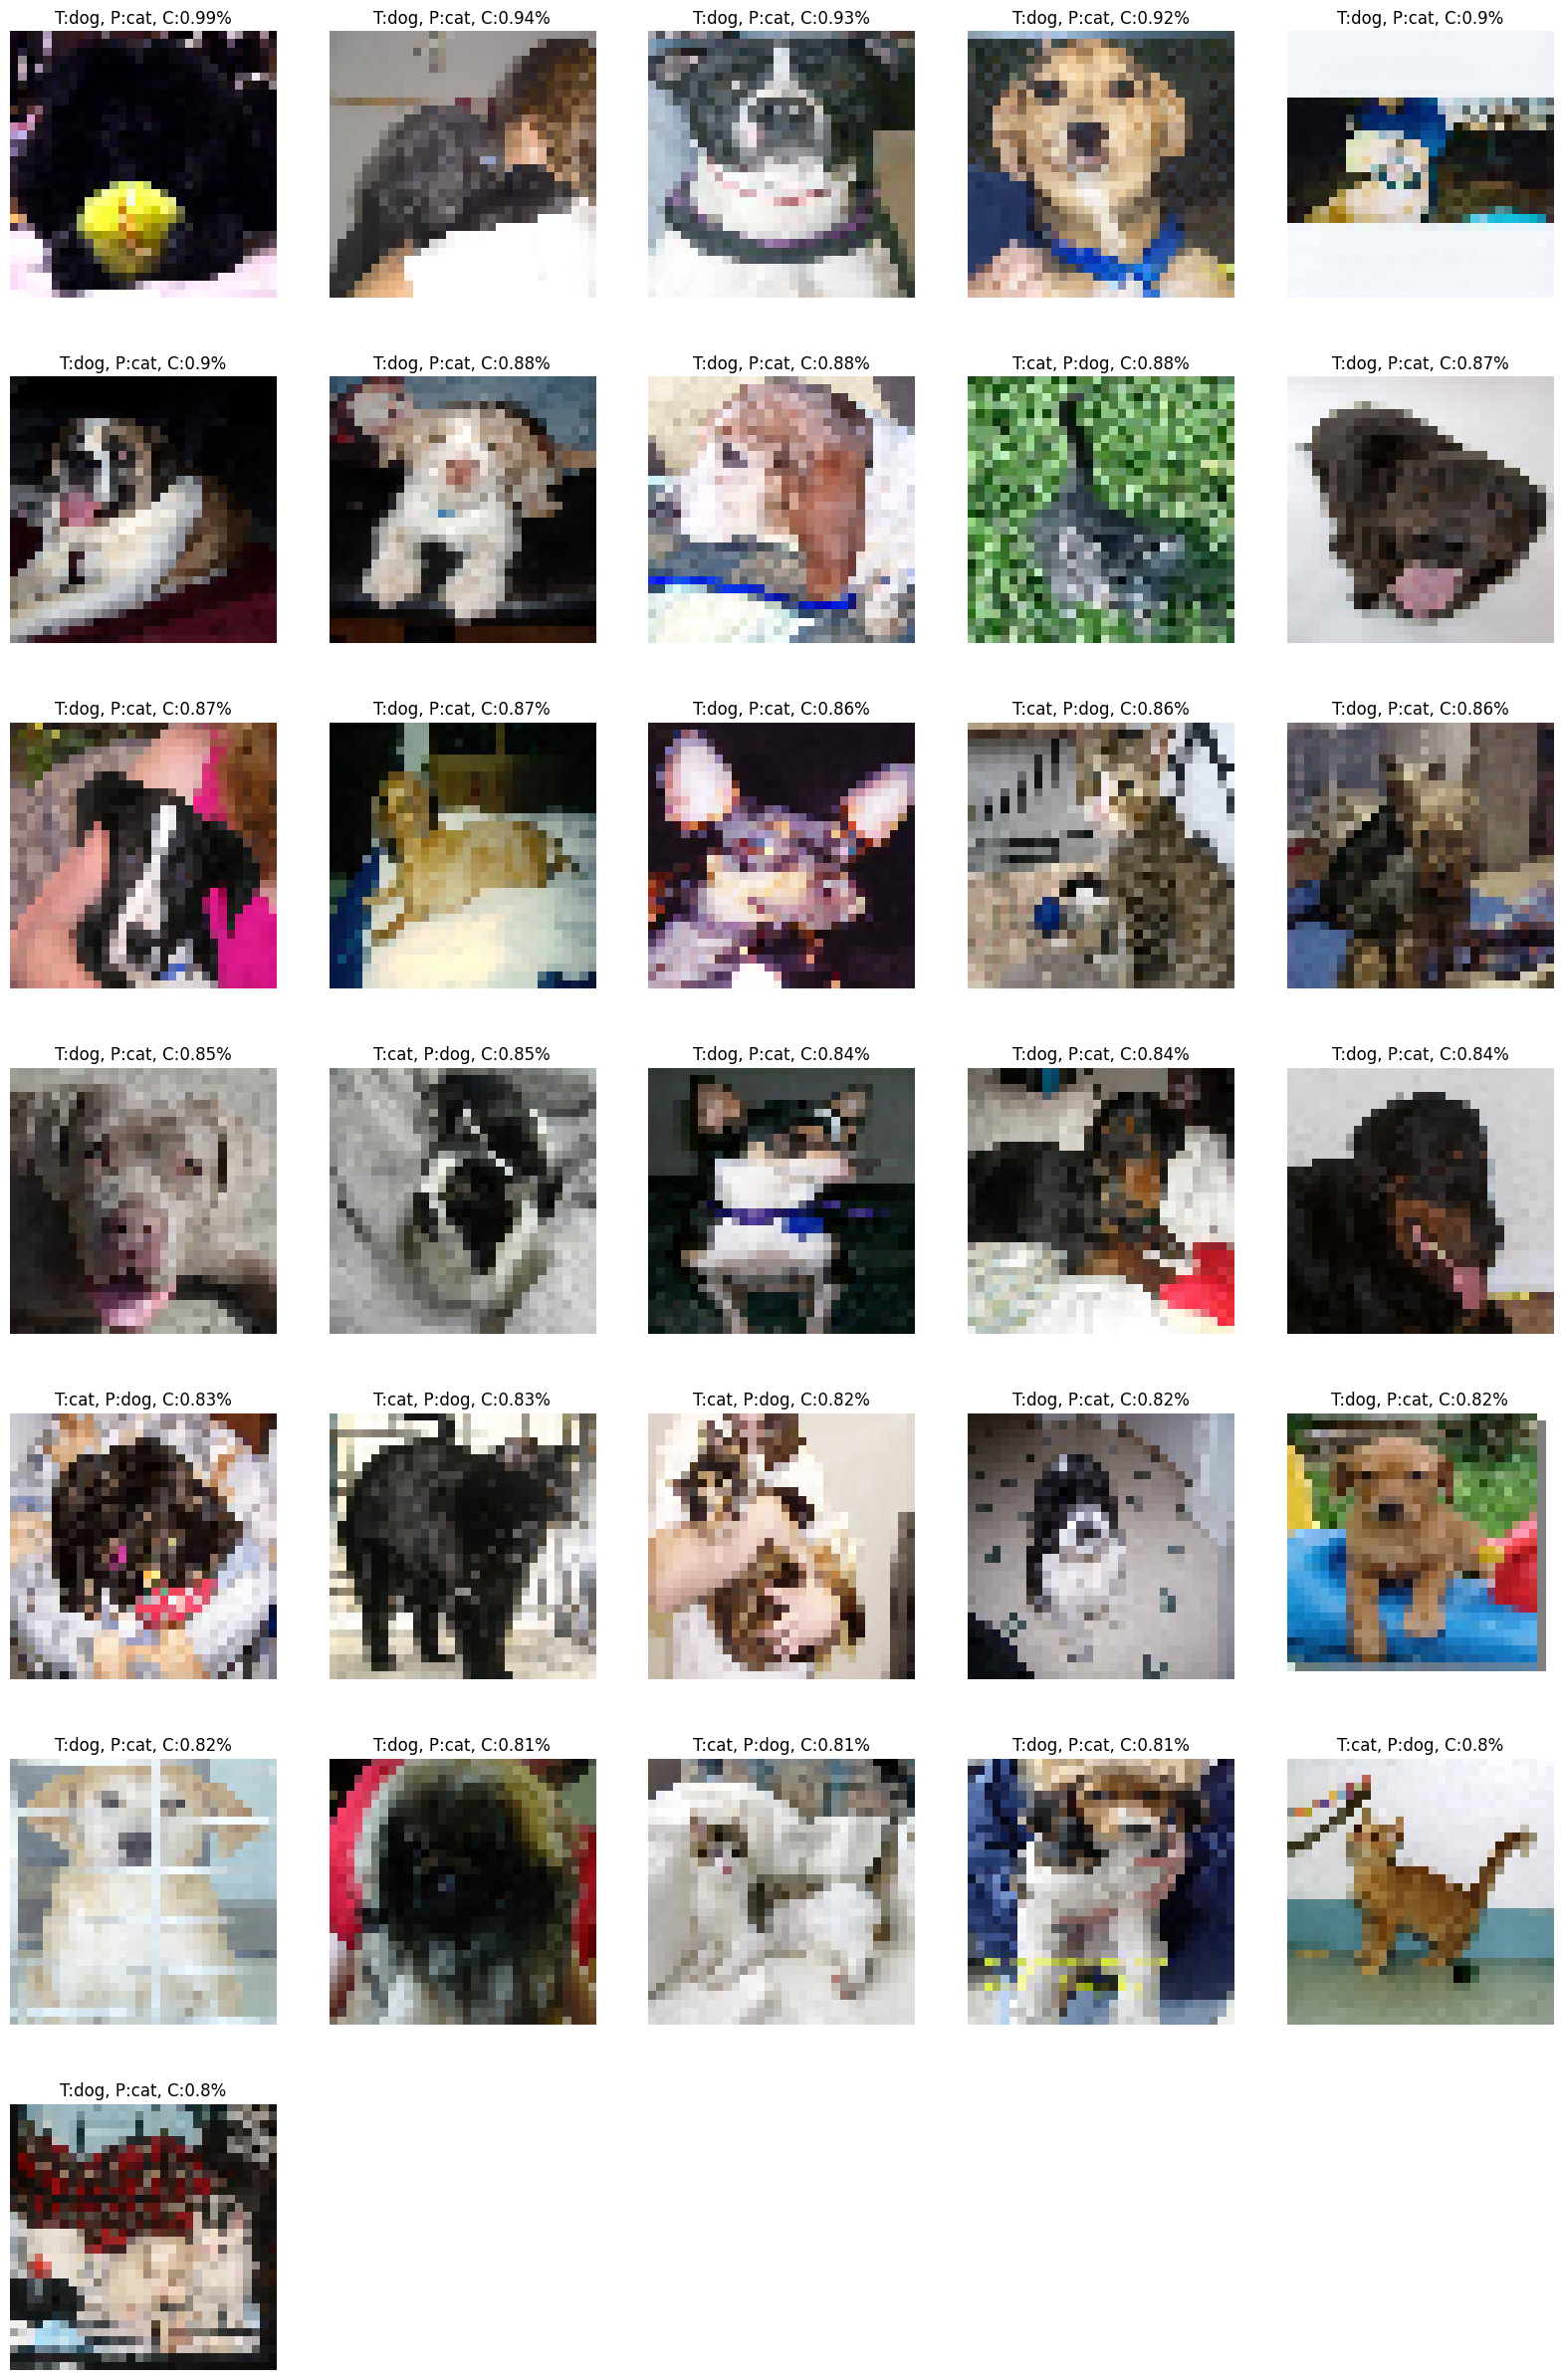

In [85]:
#se muestran 31  filas (10%) de los errores
show_images_batch(X_test[errores.iloc[0:31].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:31].values], size_scale= 4)